In [1]:
import os
import random
from textblob import TextBlob
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
spell = SpellChecker()
sentences = [
    "hello world",
    "this is a test",
    "braille to english",
    "learning is fun",
    "the quick brown fox",
    "jumps over the lazy dog",
    "braille is amazing",
    "deep learning is cool",
    "python is fun",
    "coding is awesome",
    "the sun is warm",
    "rain makes puddles",
    "birds fly high",
    "trees sway in wind",
    "rivers run fast",
    "stars twinkle at night",
    "wind feels nice",
    "flowers smell sweet",
    "snow falls soft",
    "moon lights the sky",
    "cats chase mice",
    "dogs wag tails",
    "kids laugh loud",
    "books tell stories",
    "cars zoom by",
    "trains whistle loud",
    "planes soar above",
    "boats float quiet",
    "bikes roll down hills",
    "hills look green",
    "valleys hide streams",
    "mountains touch clouds",
    "forests feel alive",
    "deserts are hot",
    "oceans wave big",
    "lakes stay calm",
    "clouds drift slow",
    "thunder sounds deep",
    "lightning flashes quick",
    "rainbows bring smiles",
    "frost sparkles cold",
    "dew wets the grass",
    "mist blurs the trees",
    "heat tires me out",
    "cold nips my nose",
    "spring wakes the earth",
    "autumn paints leaves",
    "night hushes all",
    "day buzzes with life",
    "time slips away",
    "love warms the heart",
    "friends share secrets",
    "family eats together",
    "dreams fill sleep",
    "hope lifts me up"
]
def introduce_errors(sentence, num_errors):
    letters = list(sentence)
    alpha_positions = [i for i, char in enumerate(letters) if char.isalpha()]
    if len(alpha_positions) < num_errors:
        return sentence
    error_positions = random.sample(alpha_positions, num_errors)
    for pos in error_positions:
        original_char = letters[pos]
        while True:
            new_char = random.choice('abcdefghijklmnopqrstuvwxyz')
            if new_char != original_char:
                break
        letters[pos] = new_char
    return ''.join(letters)

# Method 1: Correct sentence using TextBlob
def correct_sentence_method1(sentence):
    blob = TextBlob(sentence)
    corrected = blob.correct()
    return str(corrected)

Method 1 One error accuracy: 47.27%
Method 1 Two errors accuracy: 28.36%
Method 2 One error accuracy: 67.45%
Method 2 Two errors accuracy: 38.00%


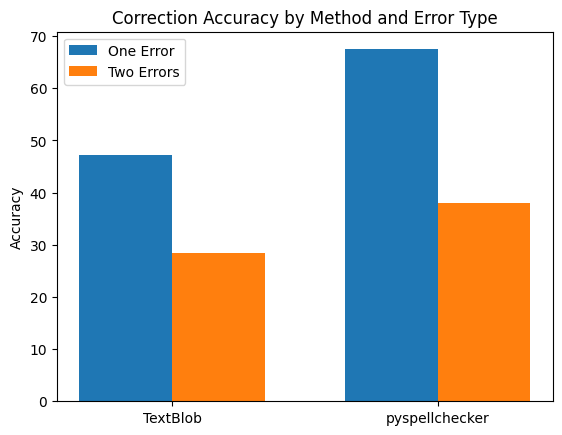

In [2]:
# Method 2: Correct sentence using pyspellchecker
def correct_sentence_method2(sentence):
    words = sentence.split()
    corrected_words = []
    for word in words:
        corrected_word = spell.correction(word)
        if corrected_word is None:
            corrected_word = word
        corrected_words.append(corrected_word)
    return ' '.join(corrected_words)

if __name__ == "__main__":
    num_versions = 10
    total_one_error = 0
    total_two_errors = 0
    correct_m1_one = 0
    correct_m1_two = 0
    correct_m2_one = 0
    correct_m2_two = 0
    for sentence in sentences:
        for _ in range(num_versions):
            erroneous_one = introduce_errors(sentence, 1)
            corrected_m1_one = correct_sentence_method1(erroneous_one)
            corrected_m2_one = correct_sentence_method2(erroneous_one)
            if corrected_m1_one == sentence:
                correct_m1_one += 1
            if corrected_m2_one == sentence:
                correct_m2_one += 1
            total_one_error += 1
            erroneous_two = introduce_errors(sentence, 2)
            corrected_m1_two = correct_sentence_method1(erroneous_two)
            corrected_m2_two = correct_sentence_method2(erroneous_two)
            if corrected_m1_two == sentence:
                correct_m1_two += 1
            if corrected_m2_two == sentence:
                correct_m2_two += 1
            total_two_errors += 1

    accuracy_m1_one = (correct_m1_one / total_one_error) * 100
    accuracy_m1_two = (correct_m1_two / total_two_errors) * 100
    accuracy_m2_one = (correct_m2_one / total_one_error) * 100
    accuracy_m2_two = (correct_m2_two / total_two_errors) * 100
    print(f"Method 1 One error accuracy: {accuracy_m1_one:.2f}%")
    print(f"Method 1 Two errors accuracy: {accuracy_m1_two:.2f}%")
    print(f"Method 2 One error accuracy: {accuracy_m2_one:.2f}%")
    print(f"Method 2 Two errors accuracy: {accuracy_m2_two:.2f}%")
    methods = ['TextBlob', 'pyspellchecker']
    one_error_accuracies = [accuracy_m1_one, accuracy_m2_one]
    two_error_accuracies = [accuracy_m1_two, accuracy_m2_two]

    x = range(len(methods))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x, one_error_accuracies, width, label='One Error')
    ax.bar([p + width for p in x], two_error_accuracies, width, label='Two Errors')
    ax.set_ylabel('Accuracy')
    ax.set_title('Correction Accuracy by Method and Error Type')
    ax.set_xticks([p + width / 2 for p in x])
    ax.set_xticklabels(methods)
    ax.legend()
    plt.savefig('accuracy_comparison.png')